# EDA
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
    Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

# 1.0 Importing dataset and cleaning data


In [2]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1 )
dataset.head(15)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [4]:
#checking null value with respect to each column
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
# The following code will create a Boolean Series for each row, where True indicates at least one null value in that row.
null_rows = dataset.isnull().any(axis=1)

# You can then use the null_rows Boolean Series to filter the DataFrame and get rows with at least one null value.
rows_with_null = dataset[null_rows]

# Now, 'rows_with_null' contains all rows with at least one null value.
rows_with_null


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## 1.1 Dropping rows which have no information


In [6]:
#dropping rows having region name and heddersa
dataset.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1, inplace=True)
dataset.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


## 1.2 Creating Region feature

In [7]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
dataset.loc[:122,'Region']=0
dataset.loc[122:, 'Region']=1

In [8]:
dataset.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


## 1.3 Datatypes and describe

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [10]:
dataset.describe()

,Region
count,244.000000
mean,0.500000
std,0.501028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


## 1.4 Data Cleaning


In [11]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
# removing space from the column name
dataset.columns=[col_name.strip() for col_name in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
### converting all feature values to string so that we can do data cleaning as shown below.
dataset=dataset.astype(str)

In [14]:
### somes values in colums also have space
for feature in dataset.columns:
 dataset[feature]= dataset[feature].str.replace(" ","")

In [15]:
### index no 165 for feature name FWI has value fire
dataset[dataset['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [16]:
### replacing fire value witha float value
dataset.loc[165,'FWI']=' 0.1'

In [17]:
### replacing nan value wit fire to make data equal to the info given in dataset 
dataset[dataset['Classes']== 'nan'].index
dataset.loc[165,'Classes']='fire'

## 1.5 Changing datatypes

In [18]:
datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
 'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64',
 'Region':'float64'}
dataset=dataset.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

## 1.6 Info about dataset and its attributes
1. The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### Attributes
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
### Weather data observation
1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90
3. Ws :Wind speed in km/h: 6 to 29
4. Rain: total day in mm: 0 to 16.8

### FWI Components
1. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
2. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
3. Drought Code (DC) index from the FWI system: 7 to 220.4
4. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
5. Buildup Index (BUI) index from the FWI system: 1.1 to 68
6. Fire Weather Index (FWI) Index: 0 to 31.1
7. Classes: two classes, namely fire and not fire

In [19]:
dataset.shape

(244, 15)

## 1.7 Checking Null values

In [20]:
### checking for null values
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

<div align="center"><h2 style="color:#FF5733;">Observation</h2></div>

1. There is no null value in dataset.
2. Total 244 rowws and 15 columns is present.


# 2.0 Numerical and continuous features

## 2.1 Categorical Features


In [23]:
# categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
#getting to know different categories in cateogrical features with its count.
for feature in categorical_features:
 print(dataset.groupby(feature)['Region'].value_counts())

Classes  Region
fire     1.0       79
         0.0       59
notfire  0.0       63
         1.0       43
Name: Region, dtype: int64


<Axes: xlabel='Classes', ylabel='count'>

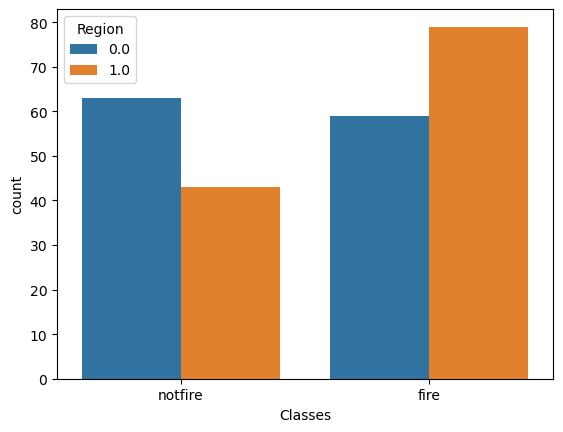

In [31]:
sns.countplot(data=dataset, x='Classes',hue='Region')

<div align="center"><h2 style="color:#FF5733;">Observation</h2></div>
1. It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.

## 2.2 Numerical features

In [32]:
### Getting list of numerical features
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [35]:
### Getting uniques values in each numerical features
dataset[numerical_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Region           2
dtype: int64

## 2.3 Seggregating discrete and continuous variables
## 2.3.1 Discrete Numerical Features

In [36]:
#here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<35]
discrete_features

['day', 'month', 'year', 'Temperature', 'Ws', 'Region']

## 2.3.1.1 Discrete Numerical Feature vs Target Feature

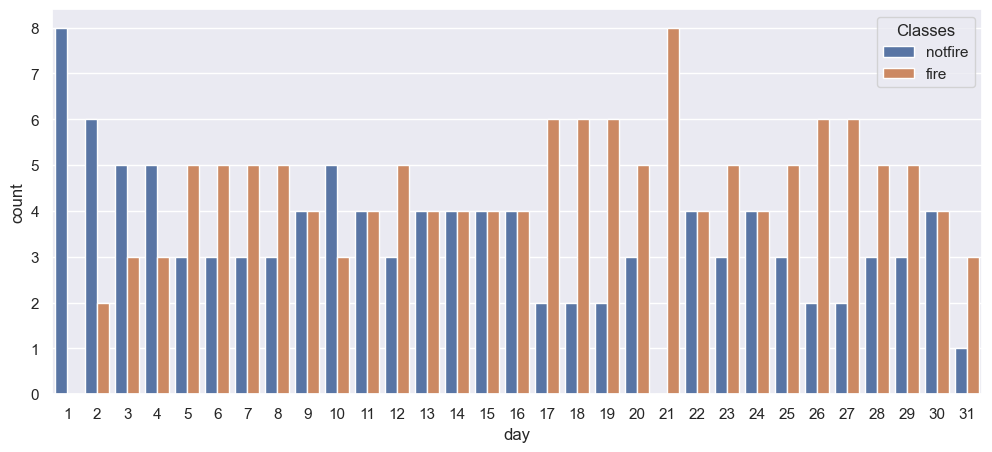

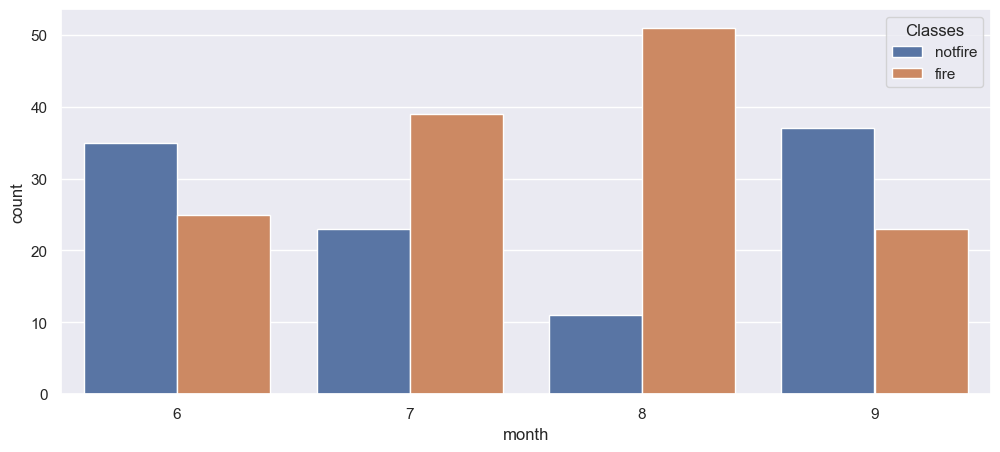

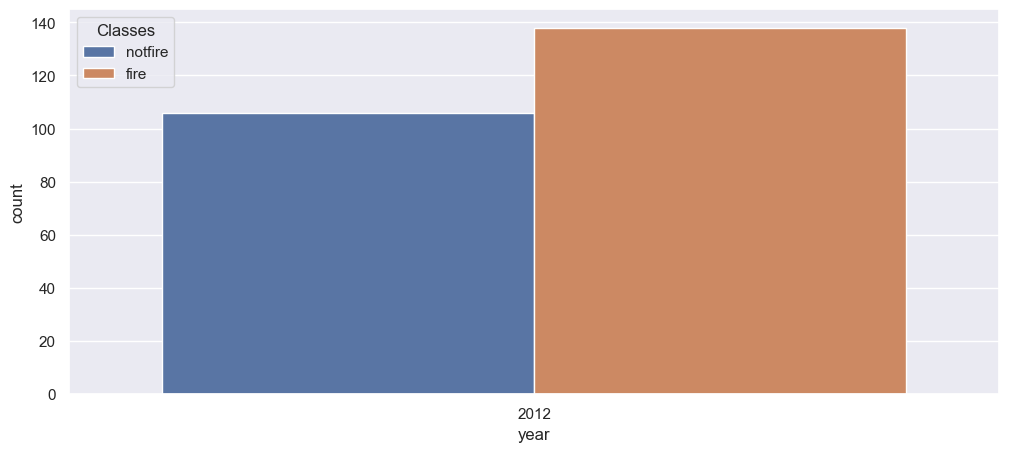

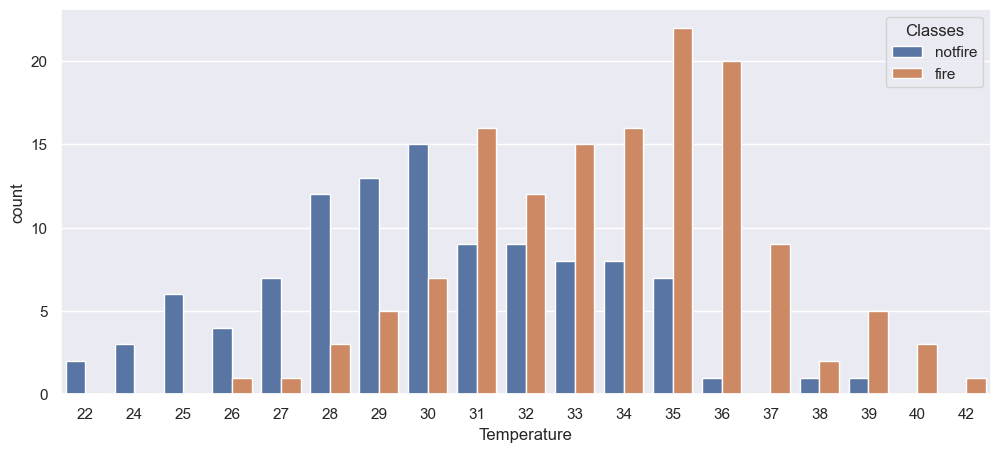

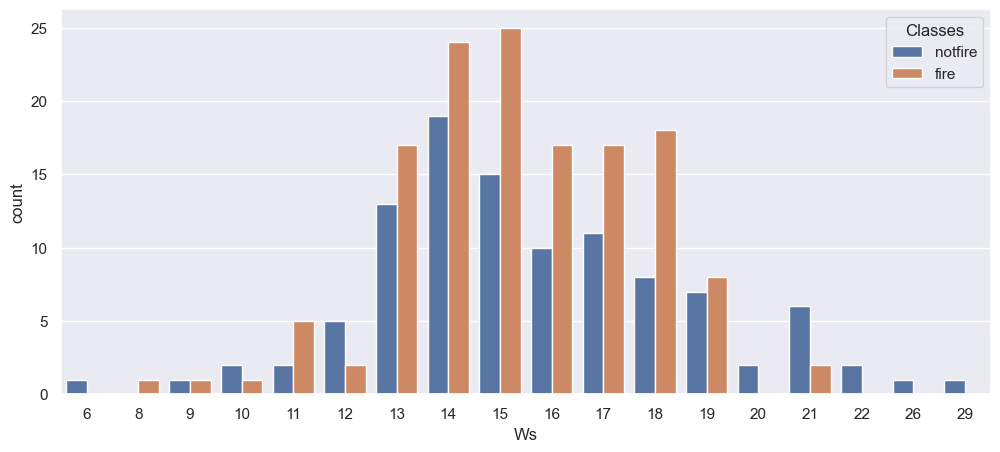

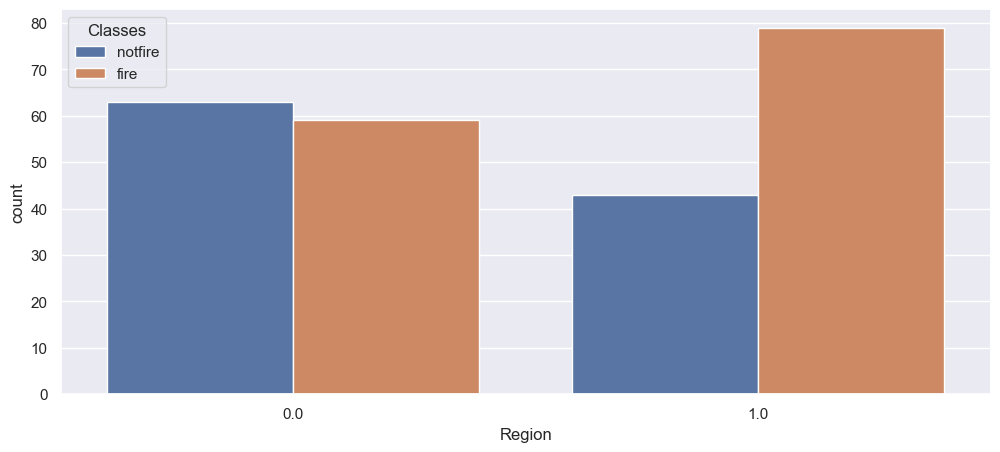

In [41]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot
for feature in discrete_features:
    sns.set(rc={'figure.figsize':(12, 5)}) 
    sns.countplot(data=dataset, x=feature, hue='Classes')
    plt.show()

<div align="center" style="background-color: yellow;"><h1 style="color: blue;">Observation</h1></div>


    1. From day vs Classes plot it is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of
    no fire cases.
    2. From month vs Classes plot it is visible that july and august month have more cases of occurance of fire as compared to other two months of
    june and september where occurance of fire is less as compared to no fire.
    3. The month of august has highest no of cases of occurance of fire
    4. Overall cases of occurance of fire is more than the cases of no occurance of fire.
    5. From temperature vs Classes plot it is visible that temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
    6. From windspeed vs Classes plot it is visible that for wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
    7. From Region vs Class plot it is visible that in Bejaia region, the no of cases of occurance of fire is less compared to no fire.
    8. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. Also Overall no of cases of occurance of fire is more
    in Sidi Bel-abbes region as compared to Bejaia region.


## 2.3.2 Continuous Numerical Features

In [42]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


## 2.3.2.1 Distribution of Continuous Numerical Features

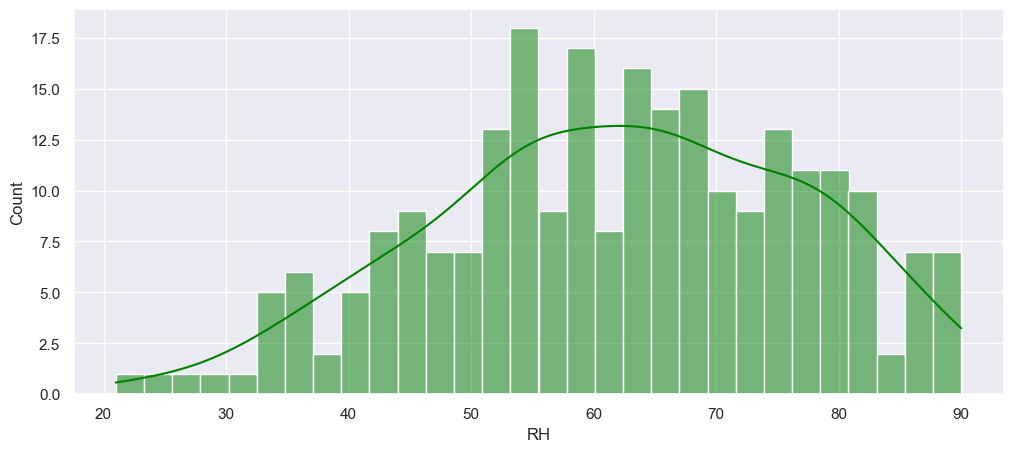

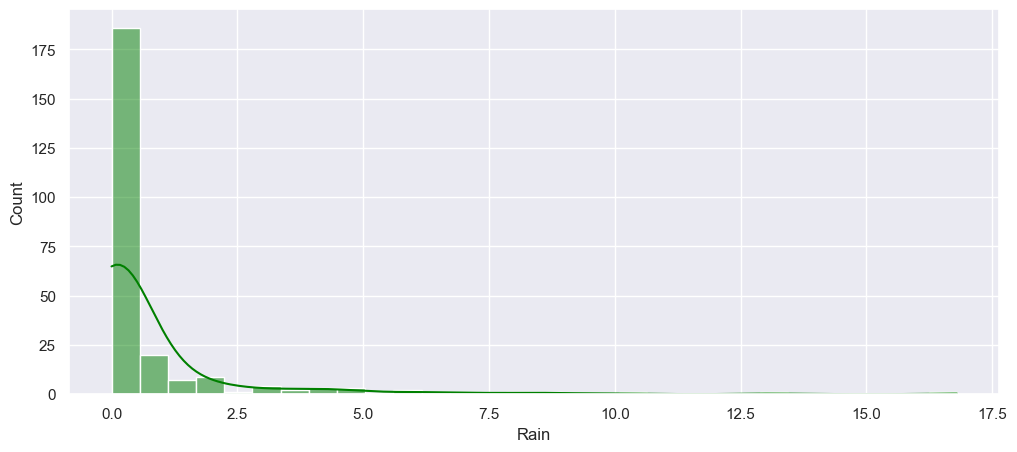

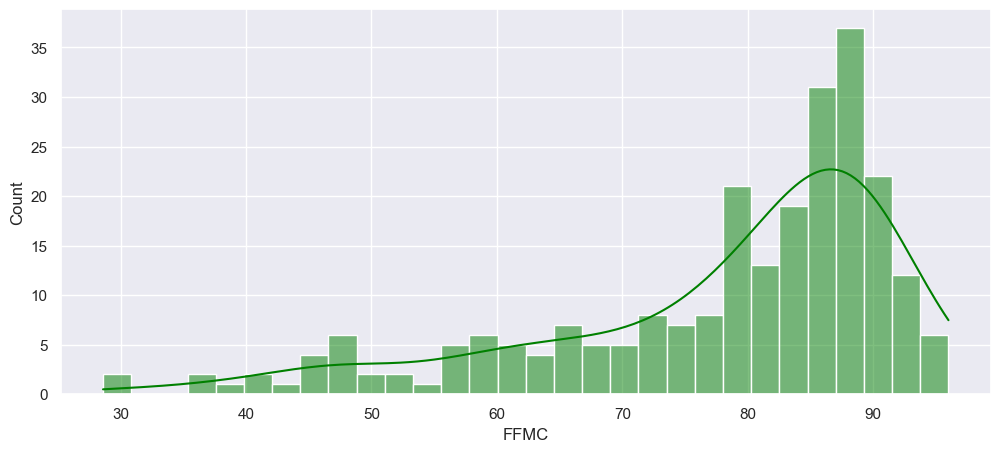

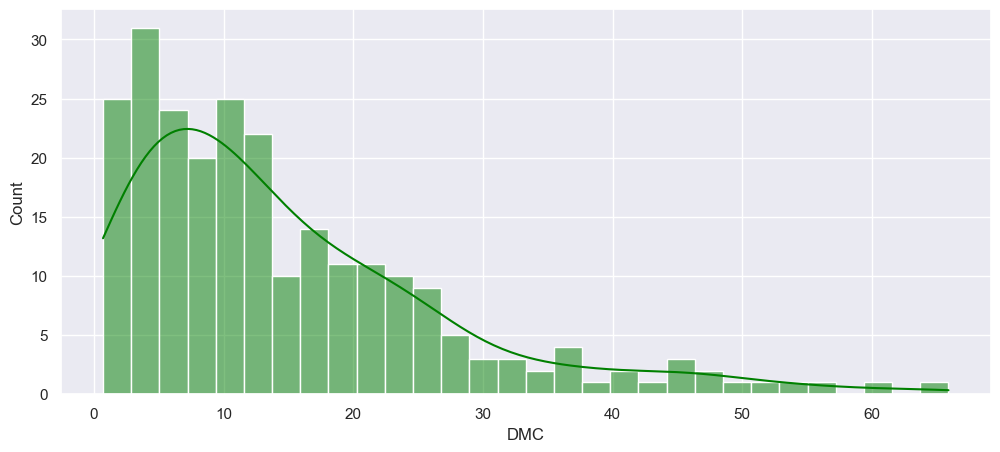

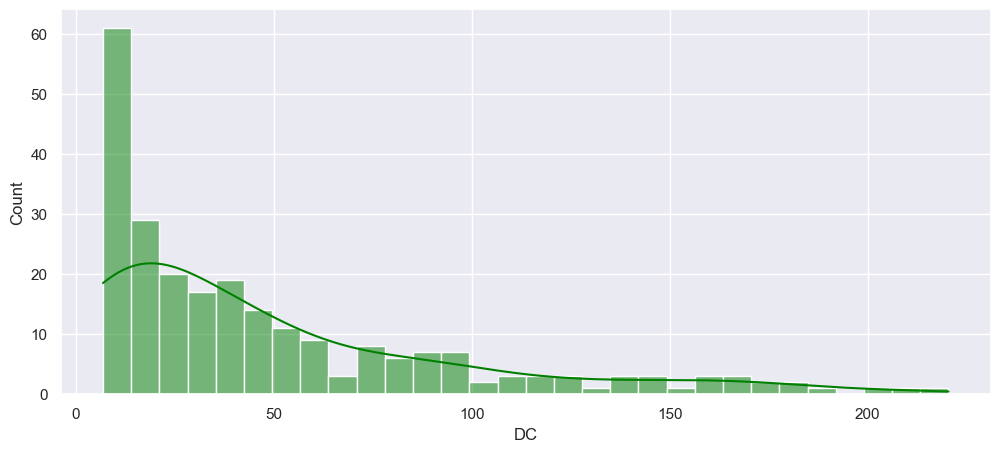

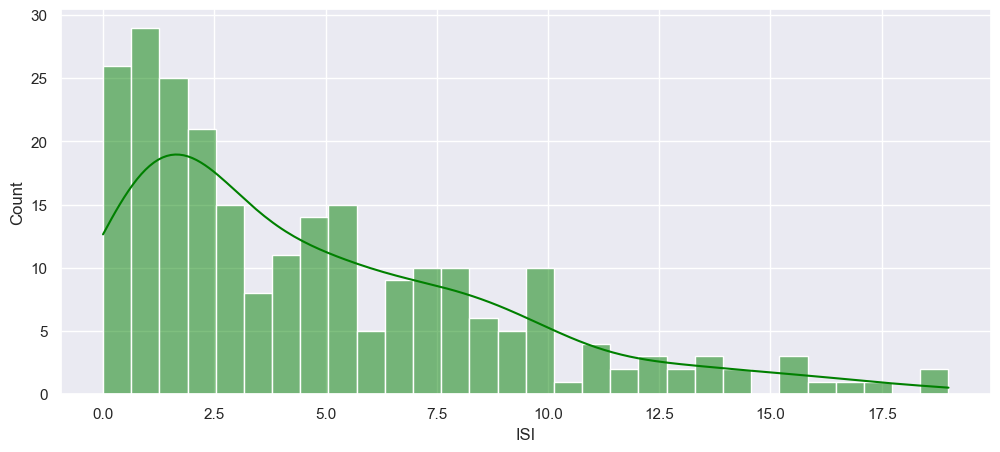

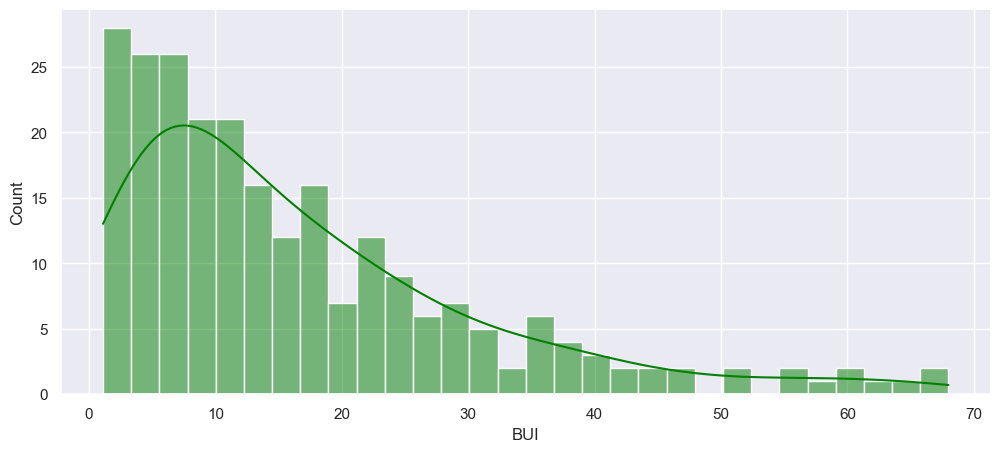

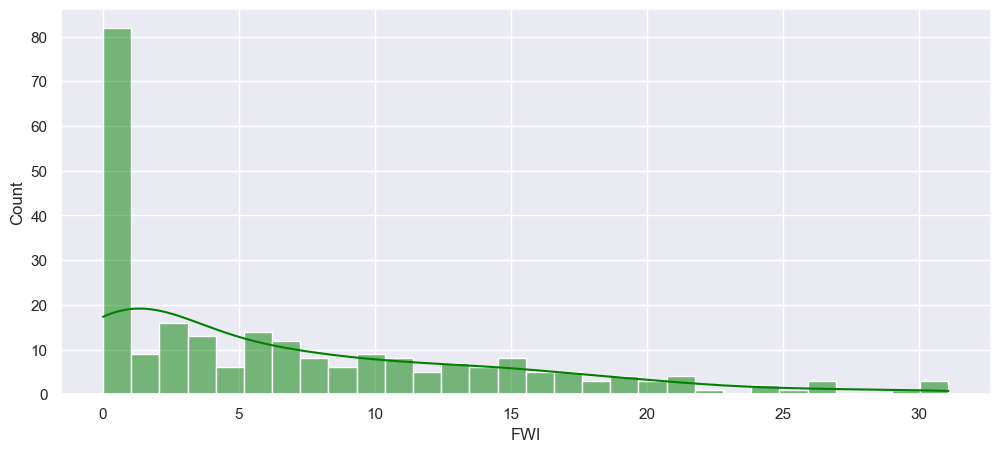

In [45]:
### Checking distribution of Continuous numerical features
for feature in continuous_features:
 sns.histplot(data=dataset, x=feature,kde=True, bins=30, color='green')
 plt.show();

<div align="center" style="background-color: yellow;"><h1 style="color: blue;">Observation</h1></div>

1. Relative humidity is following gaussian distribution.
2. Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution).
3. FFMC feature follows left skwed distribution.

## 2.4 Checking for outliers

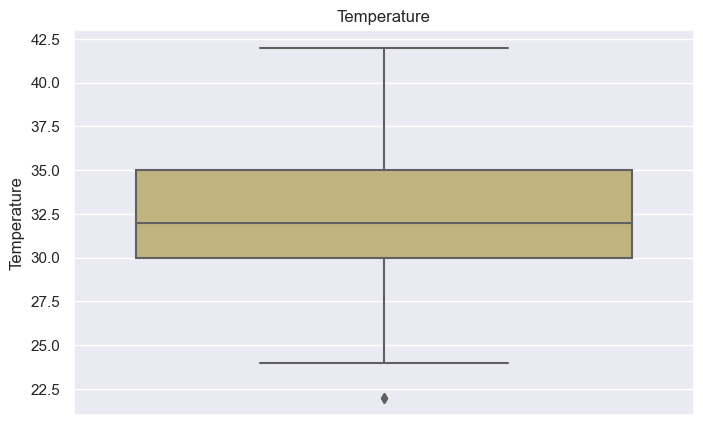

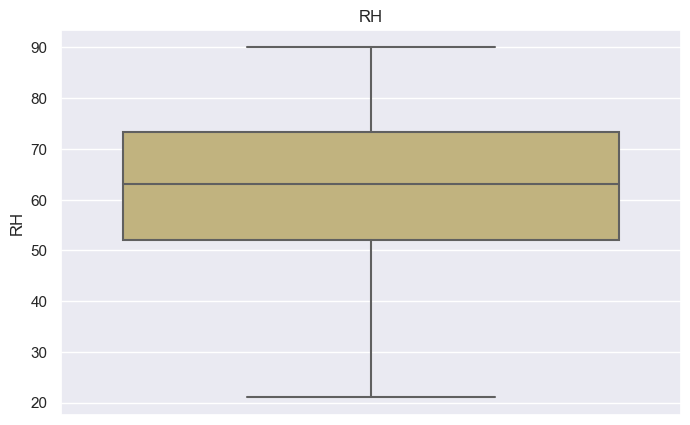

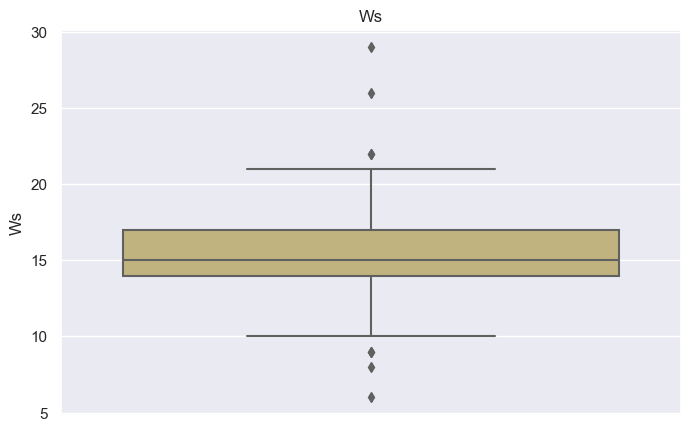

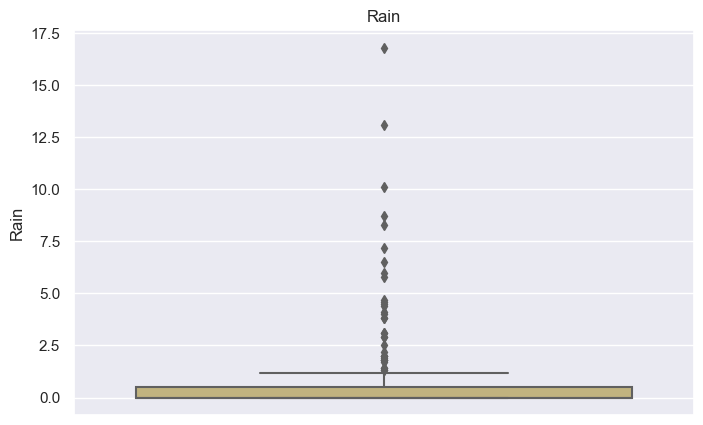

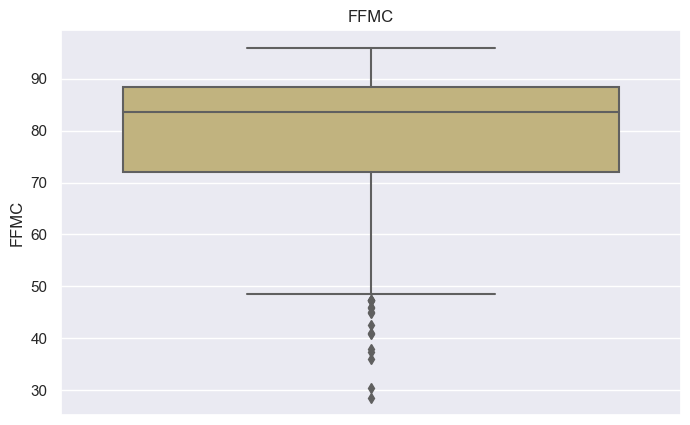

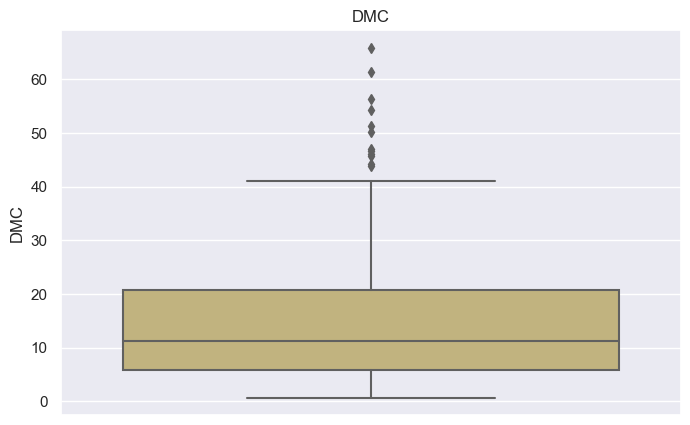

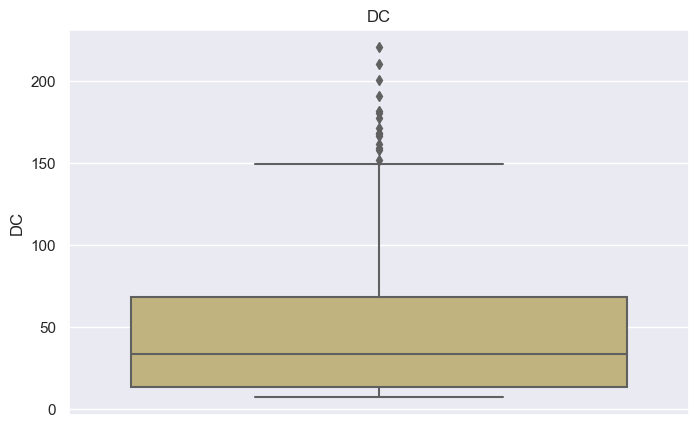

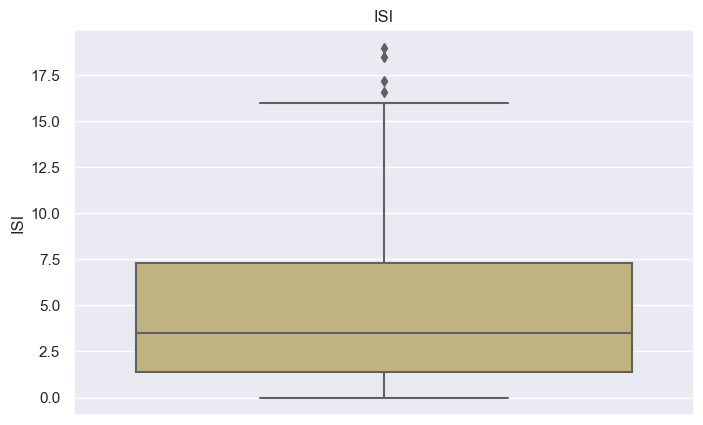

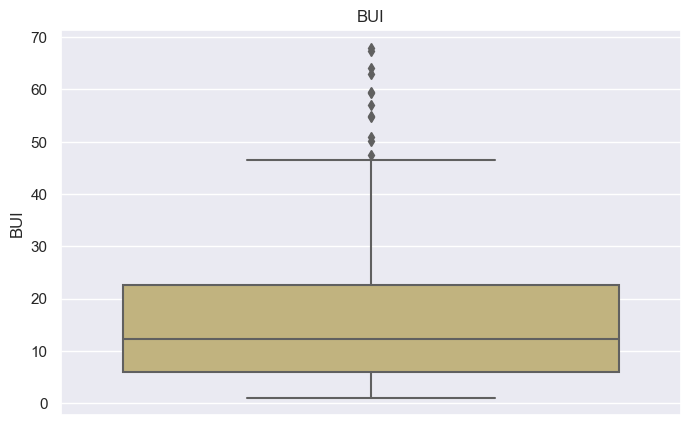

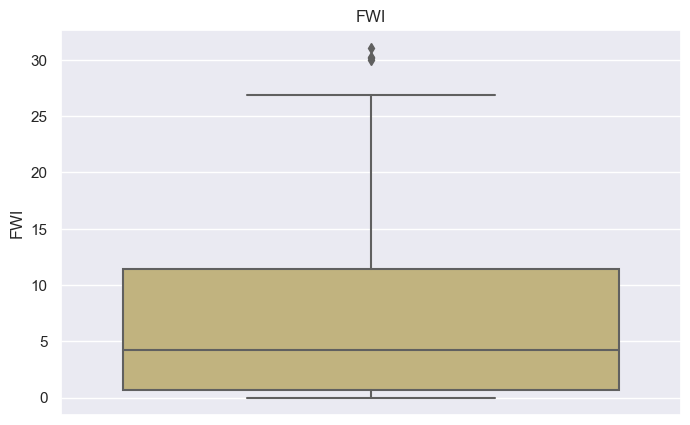

In [78]:
### excluding 'day', 'month','year', 'Region'.
for feature in [feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]:
 sns.boxplot(data=dataset, y= feature, color='y')
 plt.title(feature)
 plt.show();

<div align="center" style="background-color: yellow;"><h1 style="color: blue;">Observation</h1></div>

1. Relative Humidity, RH feature doesnt have outliers.
2. Temperature and FFMC have outliers in lower boundary side.
3. Wind Speed, Ws has outliers on both sides(Upper and lower boundary).
4. Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

# 3.0 Correlation between each Numerical features


In [56]:
corr_data=round(dataset[[feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]].corr(),2)
corr_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00


## 3.1 Heatmap to visualise the Correlation

<Axes: >

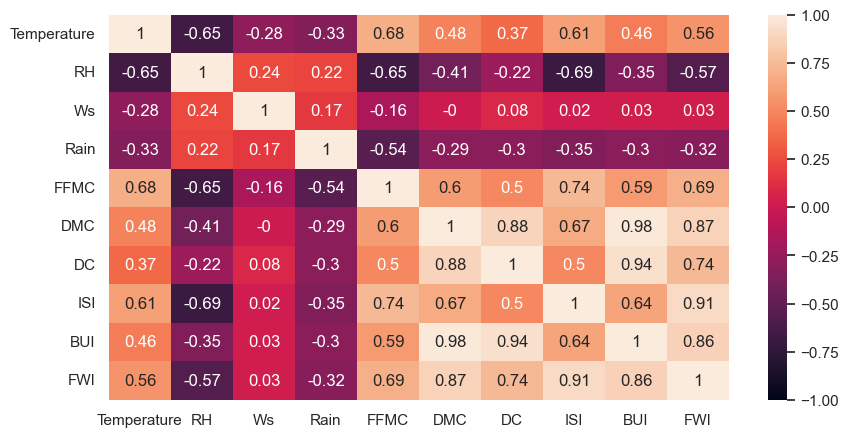

In [60]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data=corr_data, annot=True, vmin=-1, vmax=1)

### Note (For both positive and negative side)
1. Correlation coefficients between 0.9 and 1.0, very highly correlated.
2. Correlation coefficients between 0.7 and 0.9, highly correlated.
3. Correlation coefficients between 0.5 and 0.7, moderately correlated.
4. Correlation coefficients between 0.3 and 0.5, low correlation.
5. Correlation coefficients less than 0.3, little correlation


<div align="center" style="background-color: yellow;"><h1 style="color: blue;">Observation</h1></div>

1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI

Note: Features with very high correlation are more linearly dependent and hence have almost the same effect on the dependent
variable. So, we can drop one of the two features.

## 3.2 Relationship between numerical feature and target feature
### 1. strip plot

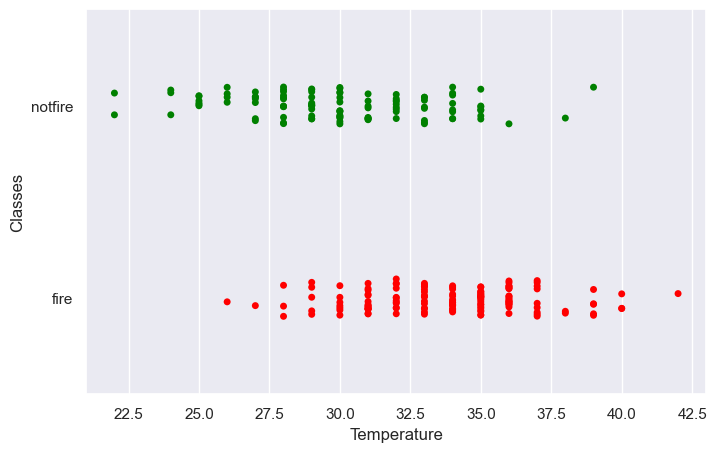

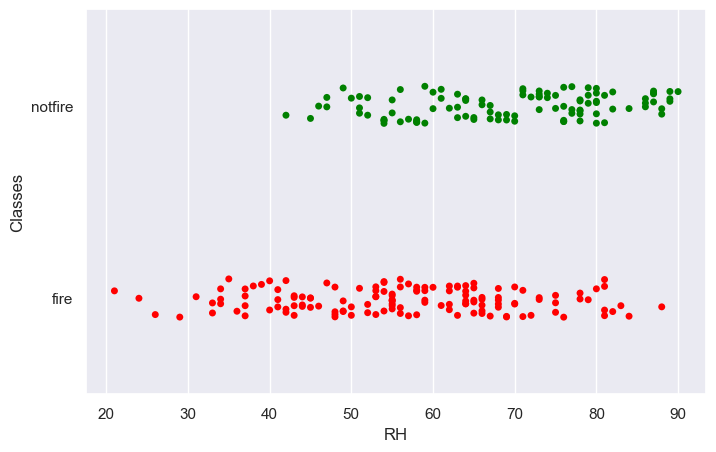

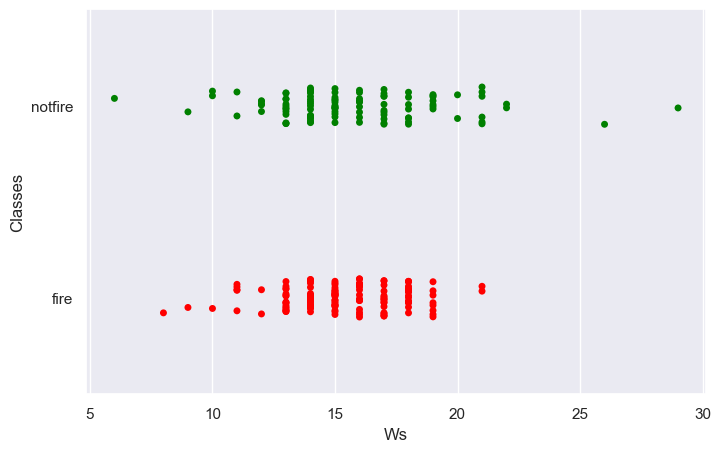

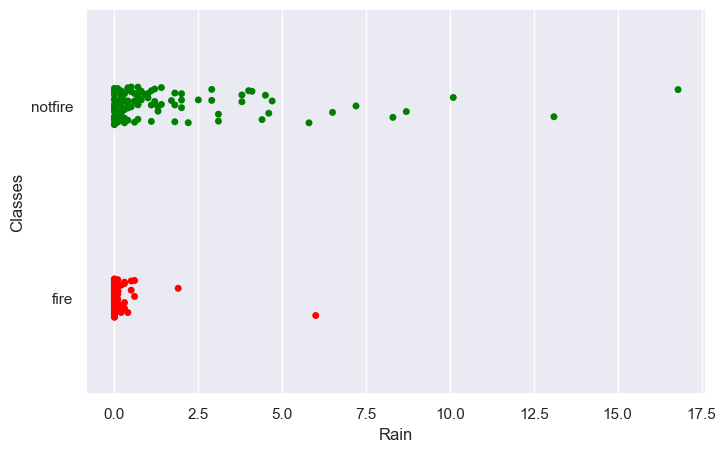

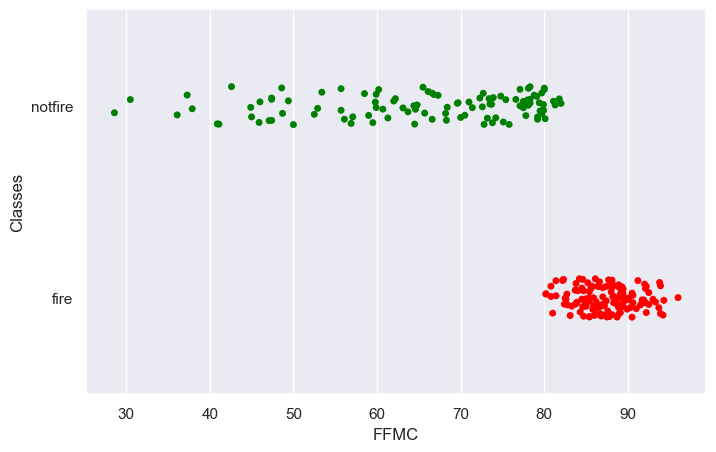

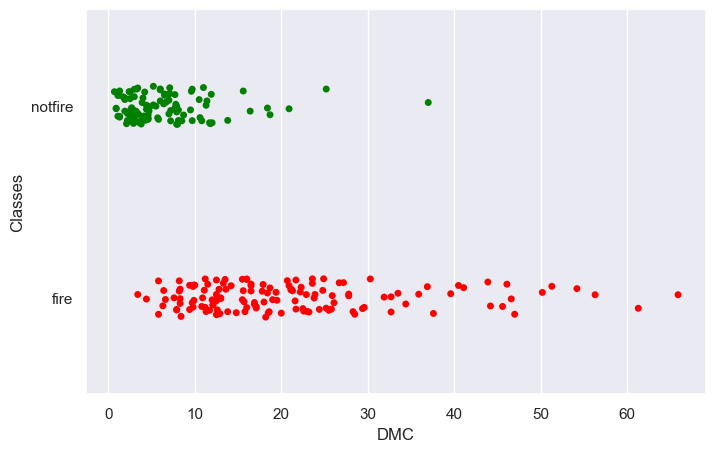

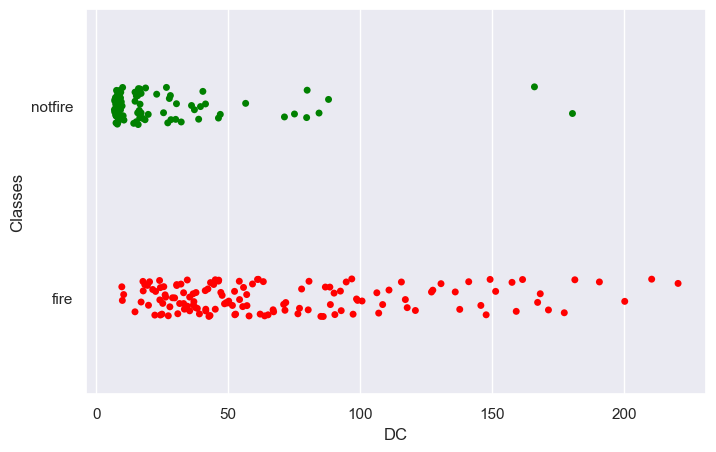

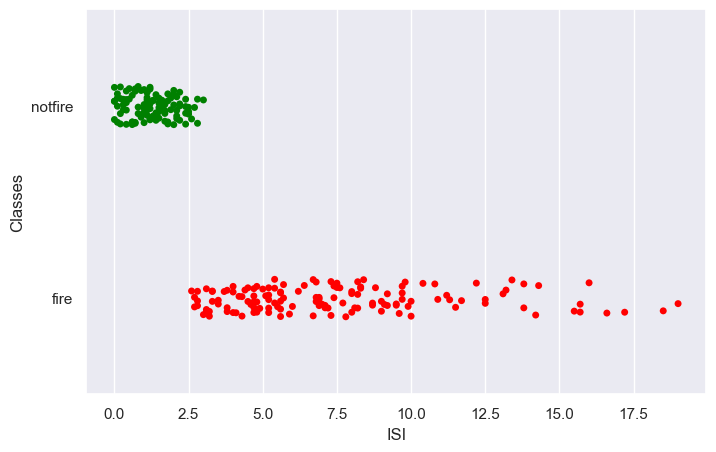

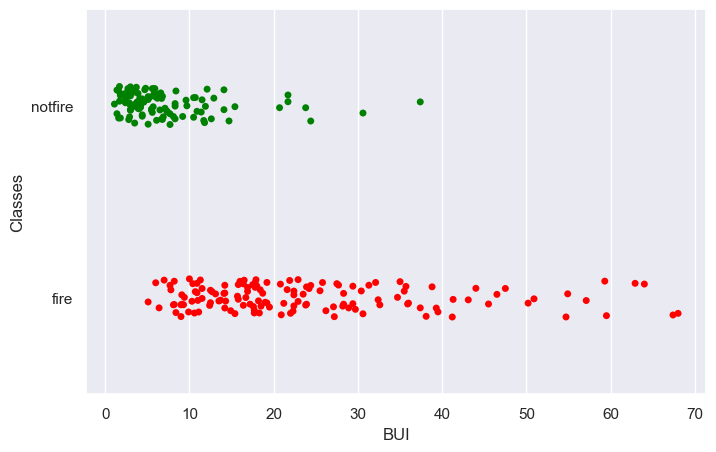

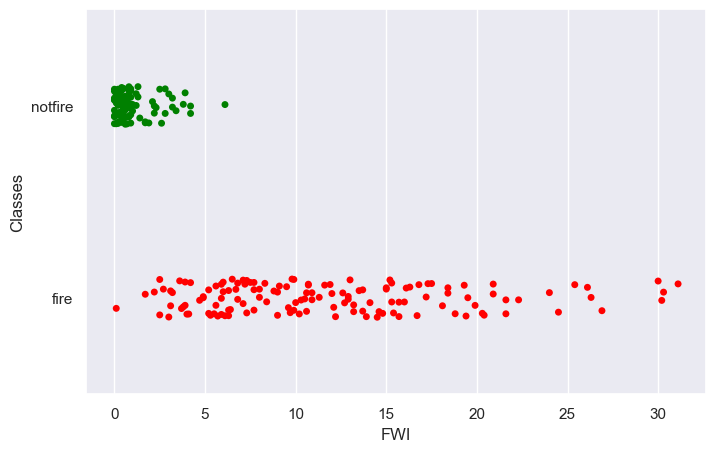

In [65]:
num_feature_custom=[feature for feature in numerical_features if feature not in ['day', 'month', 'year', 'Region']]
sns.set(rc={'figure.figsize':(8,5)})
for feature in num_feature_custom:
 sns.stripplot(data=dataset, x=feature, y='Classes',palette=['green','red'])
 plt.show();

<div align="center" style="background-color: yellow;"><h1 style="color: blue;">Observation</h1></div>
<ul>
    <li>It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.</li>
    <li>For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.</li>
    <li>Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.</li>
    <li>For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.</li>
    <li>DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.</li>
</ul>


<div align="center" style="background-color: red;"><h1 style="color: yellow;">Final Observation</h1></div>

1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
3. Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
4. Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
5. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
6. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
7. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
8. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
9. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
10. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
11. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
12. July and august have more cases of fire as compared to no fire.
13. June and september have more cases of no fire as compared to fire.
14. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
15. There is no null vales in dataset.
